In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

Here we consider the five levels system. 70s, 6p and 5s rubidium levels.

- We use a two photons proces to couple the 5s to the 70s. We use a blue-detuned blue laser to couple out of resonance the 5s with the 6p, and a red-detuned IR laser to couple out of resonance the 6p with the 70s.

- Then to controll the dissipation we use an other beam to stimolate the decay from the 70s to the 6p, then use the spontaneus decay of the 6p, that is much faster than the stimolated decay of the 70s, to couple the 6p with the 5s. We assume that there is a fixed probability for an atom to decay from 6p to the 5s. 

Equations:

$$ 0\;) \;\; \frac{dN_{5s}}{dt} = N_{6p}\Gamma_{spon}^{6p} - N_{5s}(\Gamma_{exct}^{70s}+\Gamma_{exct}^{blue}) $$

$$ 1\;) \;\; \frac{dN_{6pF2}}{dt} = N_{70s}\Gamma_{dep} - N_{6pF2} \Gamma_{spon}^{6p} $$

$$ 2\;) \;\; \frac{dN_{6pF1}}{dt} = N_{5s} \Gamma_{exct}^{blue} - N_{6pF1} (\Gamma_{spon}^{6p} + \Gamma_{exct}^{6pF1}) $$

$$ 3\;) \;\; \frac{dN_{70s}}{dt} = N_{5s}\Gamma_{exct}^{70s} + N_{6pF1} \Gamma_{exct}^{6pF1}  - N_{70s} \Gamma_{dep} $$


<img src="figures/levels_facilitation.png" alt="levels" class="bg-primary mb-1" width="500px">

Where $\Gamma_{spon}^{6p}$ is the spontaneous decay rate from 6p to 5s. 
$\Gamma_{exct}^{70s}$ is the excitation rate from 5s to 70s. 
$\Gamma_{dep}$ is the depumping rate from 70s to 6p(F=2). 
$\Gamma_{exct}^{blue}$ is the excitation rate out of resonance from 5s to 6p(F=1). 
$\Gamma_{exct}^{6pF1}$ is the excitation rate out of resonance from 6p(F=1) to 70s.


[80. 80. 80. 80. 80.]


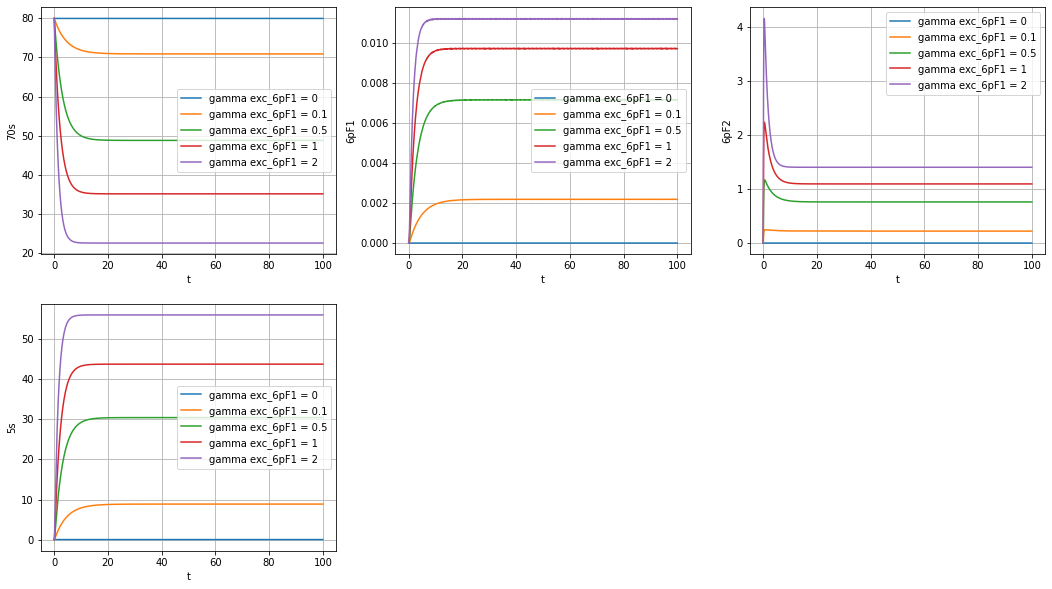

In [8]:
# rates expressed in Mhz
gamma_spon_6p = 8
gamma_exct_70s = 0.2
gamma_depumping = 0.2
gamma_exct_blue = 0.002
gamma_exct_6pF1 = 1
freq_range = [0, 0.1, 0.5, 1, 2]

initial_atoms = 80
time_range = 100

results = {"70s": [], "6pF1": [], "6pF2": [], "5s": []}

for gamma_exct_6pF1 in freq_range:
    gamma_depumping=gamma_exct_6pF1/4
    equations = np.array([
        [-gamma_exct_70s-gamma_exct_blue , 0                , gamma_exct_blue               , gamma_exct_70s   ], 
        [gamma_spon_6p                   , -gamma_spon_6p   , 0                             , 0                ], 
        [gamma_spon_6p                   , 0                , -gamma_spon_6p-gamma_exct_6pF1, gamma_exct_6pF1  ],
        [0                               , gamma_depumping  , 0                             , -gamma_depumping ]
    ])

    F = lambda t, s: np.dot(equations.T, s)

    t_eval = np.arange(0, time_range, 0.01)

    # number of initial atoms in each state.
    ######################   5sF1, 5sF2,    5p,   6p,  70s 
    inizial_conditions = [      0,    0,     0,  initial_atoms]
    sol = solve_ivp(F, [0, time_range], inizial_conditions, t_eval=t_eval, method="RK45")

    results["70s"].append(sol.y.T[:, 3])
    results["6pF1"].append(sol.y.T[:, 2])
    results["6pF2"].append(sol.y.T[:, 1])
    results["5s"].append(sol.y.T[:, 0])


plt.figure(figsize = (18, 10))
final_tot_atoms = np.zeros(len(freq_range))

for j, level_plotted in enumerate(results.keys()):
    
    k = 231+j
    plt.subplot(k)
    for i, sol in enumerate(results[level_plotted]):
        plt.plot(t_eval, sol, label=f"gamma exc_6pF1 = {freq_range[i]}")
        final_tot_atoms[i]+=sol[-1]
    plt.xlabel('t')
    plt.ylabel(level_plotted)
    plt.legend()
    
    plt.grid()

print(final_tot_atoms)